<a href="https://colab.research.google.com/github/ANS1514/Projects_in_AI-ML/blob/main/AI_ML_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. The objective function for logistic regression using MLE is the log-likeliood function or the negative log-likelihood (NLL) function, usaully preferring the NLL due to the focus on minimizing rather than maximizing. MAP, Maximum a posteriori, is a technique that is based on Bayes' theorem, it looks to find parameters that maximixe posterior probablility. An example give in researching MAP was MLE measures an NBA players free throw percentage from game to game, while MAP accounts for their career free throw percentage. MLE performs very well with large datasets as its ability to estimate gets better, while MAP helps more to regularize, reduce overitting, and incorperate prior data resulting in a more balanced estimation.

$$
NLL = -\frac{1}{n} \sum_{i=1}^n \sum_{j=1}^C y_{ij} log(p_{ij})
$$

2. A problem I would solve using Logistic Regression would be to predict if a customer would buy a product. Ever since I learned that Netflix's recommendation algorithm was based on machine learning I wanted to learn exactly how and try for myself, and I feel you can apply this concept to purchasing products as well. A comsumer will either buy a product or won't so it's a classification problem, logistic regression would be best for this case due to it's ability to predict based on linearly seperable data and account for previous decisions.

3. How my dataset would compare to the variables in my equations, n = # data points, c = # classes, y_ij = binary indicator (0 or 1), p_ij = predicted probability that i belongs to j. We assume that the data is i.i.d, the classes are 'buy', 'not buy', and there is a linear relationship between the features.



Citation
https://medium.com/@devcharlie2698619/the-intuition-behind-maximum-likelihood-estimation-mle-and-maximum-a-posteriori-estimation-map-b8ba1ba1078f
https://medium.com/aimonks/loss-function-the-secret-ingredient-to-building-high-performance-ai-models-88415112b94d



In [3]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, ParameterGrid, ParameterSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Upload the file
uploaded = files.upload()

# File is on the github repo
df = pd.read_csv("digital_marketing_campaign_dataset.csv")
print(df)

Saving digital_marketing_campaign_dataset.csv to digital_marketing_campaign_dataset (1).csv
      CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
0           8000   56  Female  136912    Social Media      Awareness   
1           8001   69    Male   41760           Email      Retention   
2           8002   46  Female   88456             PPC      Awareness   
3           8003   32  Female   44085             PPC     Conversion   
4           8004   60  Female   83964             PPC     Conversion   
...          ...  ...     ...     ...             ...            ...   
7995       15995   21    Male   24849           Email      Awareness   
7996       15996   43  Female   44718             SEO      Retention   
7997       15997   28  Female  125471        Referral  Consideration   
7998       15998   19  Female  107862             PPC  Consideration   
7999       15999   31  Female   93002           Email      Awareness   

          AdSpend  ClickThroughRate  Conver

In [4]:
# Initial Findings
df.info()
print("\nUnique Values\n", df.nunique())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [5]:
# Drop columns with 1 unique value
df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'], axis=1, inplace=True)

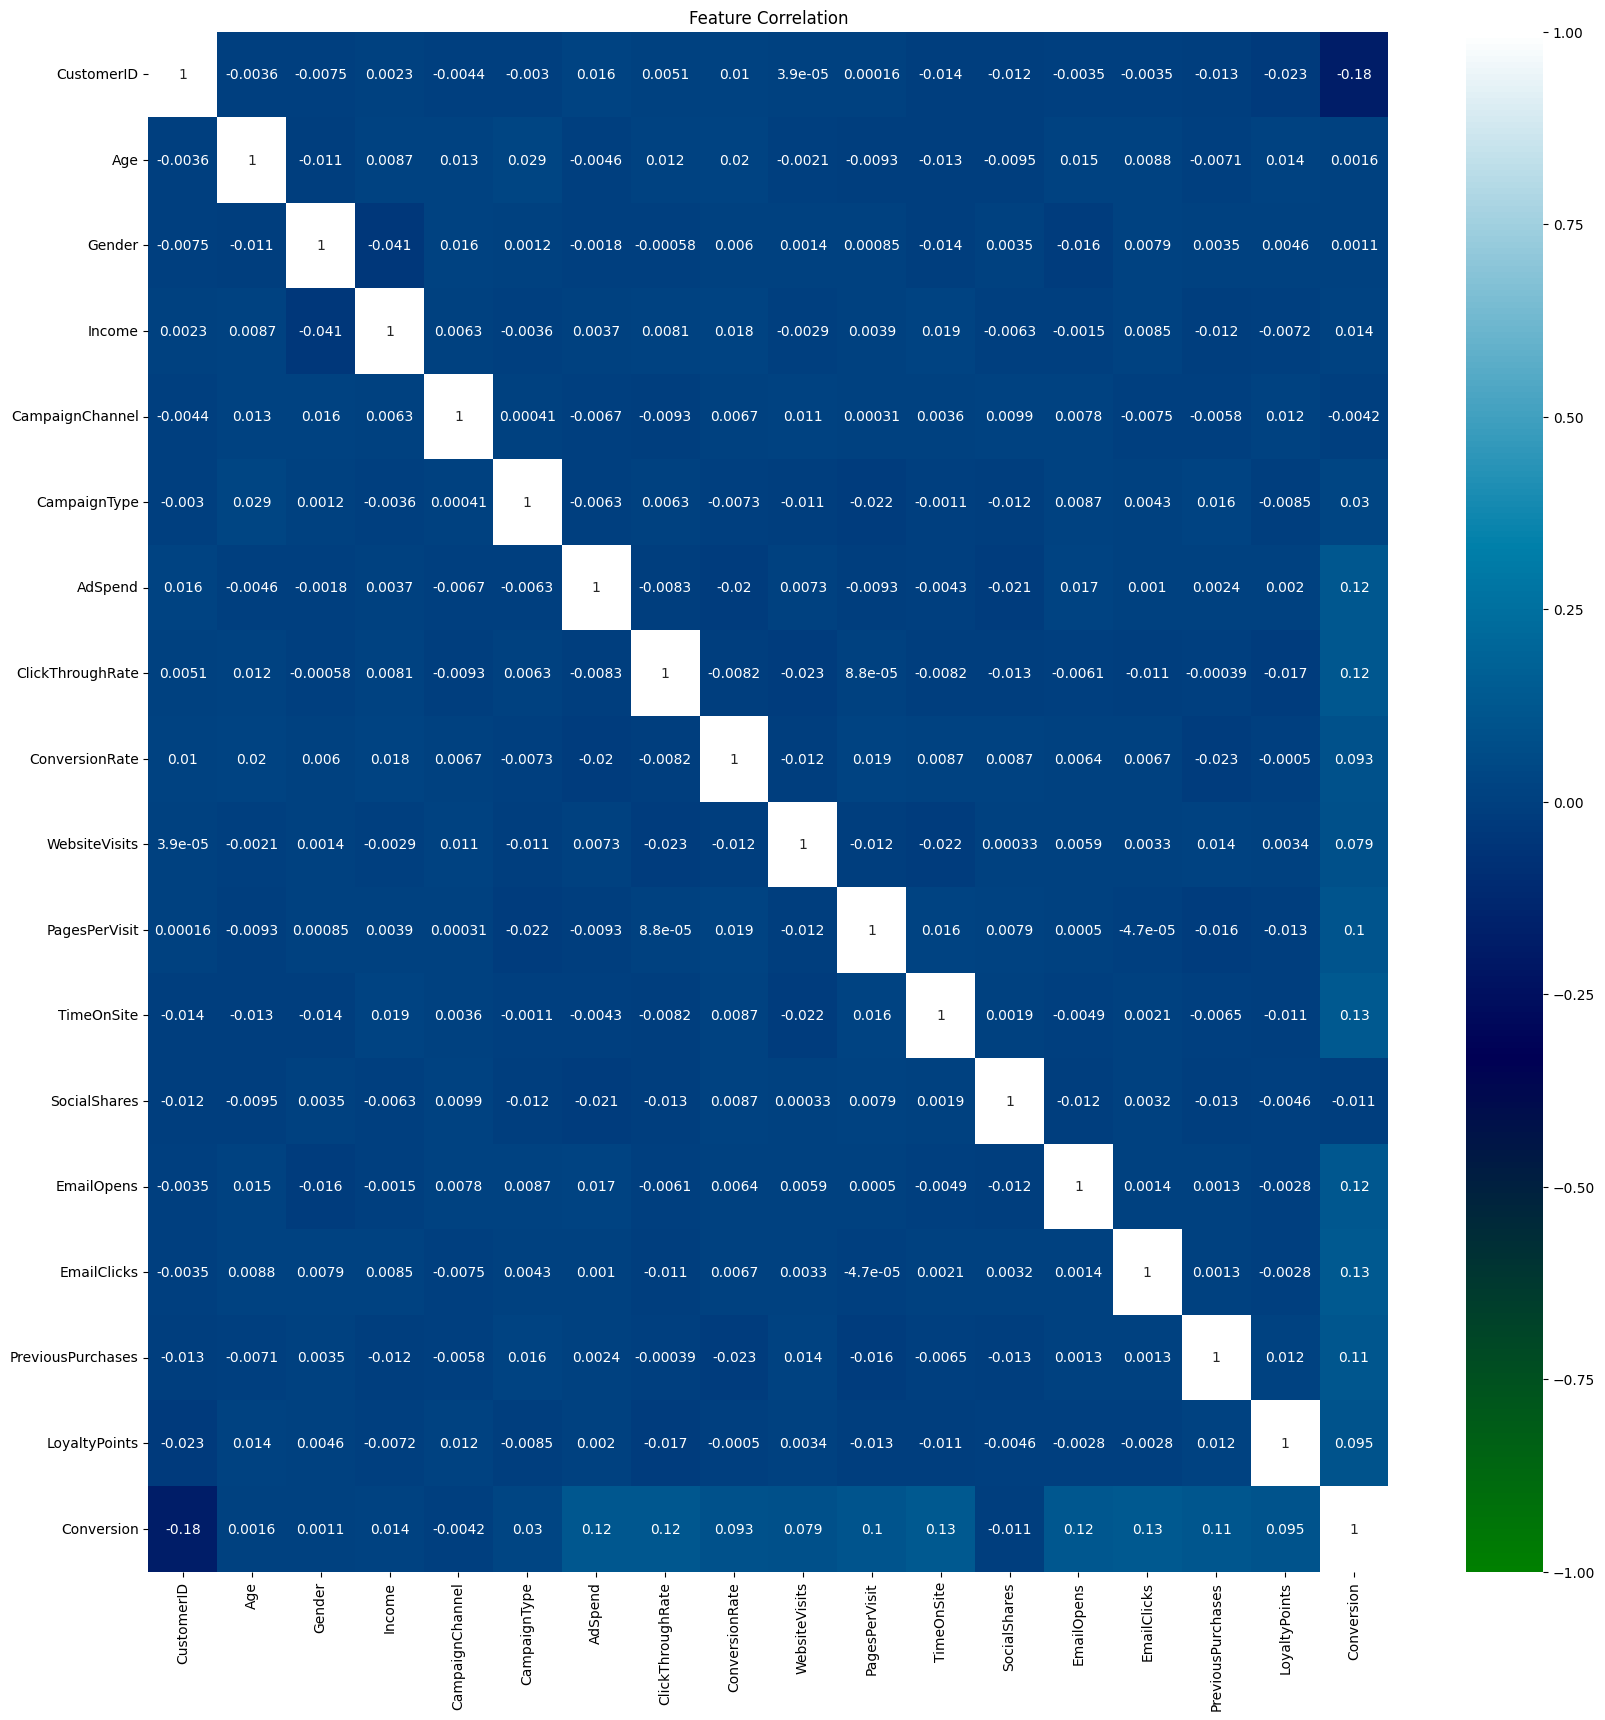

In [6]:
label_encoder = preprocessing.LabelEncoder()
df_encoded = df
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])
df_encoded['CampaignChannel'] = label_encoder.fit_transform(df_encoded['CampaignChannel'])
df_encoded['CampaignType'] = label_encoder.fit_transform(df_encoded['CampaignType'])
corr_matrix = df_encoded.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='ocean', vmin=-1, vmax=1)
plt.title("Feature Correlation")
plt.show()

In [7]:
vif_data = pd.DataFrame()
vif_data['Feature'] = df_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(len(df_encoded.columns))]

print(vif_data)
# We can keep all of the other features since their VIF is greater than 1

              Feature        VIF
0          CustomerID  18.688973
1                 Age   8.678923
2              Gender   1.640088
3              Income   5.755861
4     CampaignChannel   2.956974
5        CampaignType   2.771514
6             AdSpend   4.079952
7    ClickThroughRate   4.342265
8      ConversionRate   4.546806
9       WebsiteVisits   3.902259
10      PagesPerVisit   5.355133
11         TimeOnSite   4.287630
12       SocialShares   3.805289
13         EmailOpens   3.738761
14        EmailClicks   3.448521
15  PreviousPurchases   3.378342
16      LoyaltyPoints   3.944060
17         Conversion   9.330870


<ipython-input-8-5c51f183f7b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_matrix.index.values.tolist(), y=corr_matrix.values.tolist(), palette='ocean')


<Axes: title={'center': 'Correlation coefficient for Conversions'}>

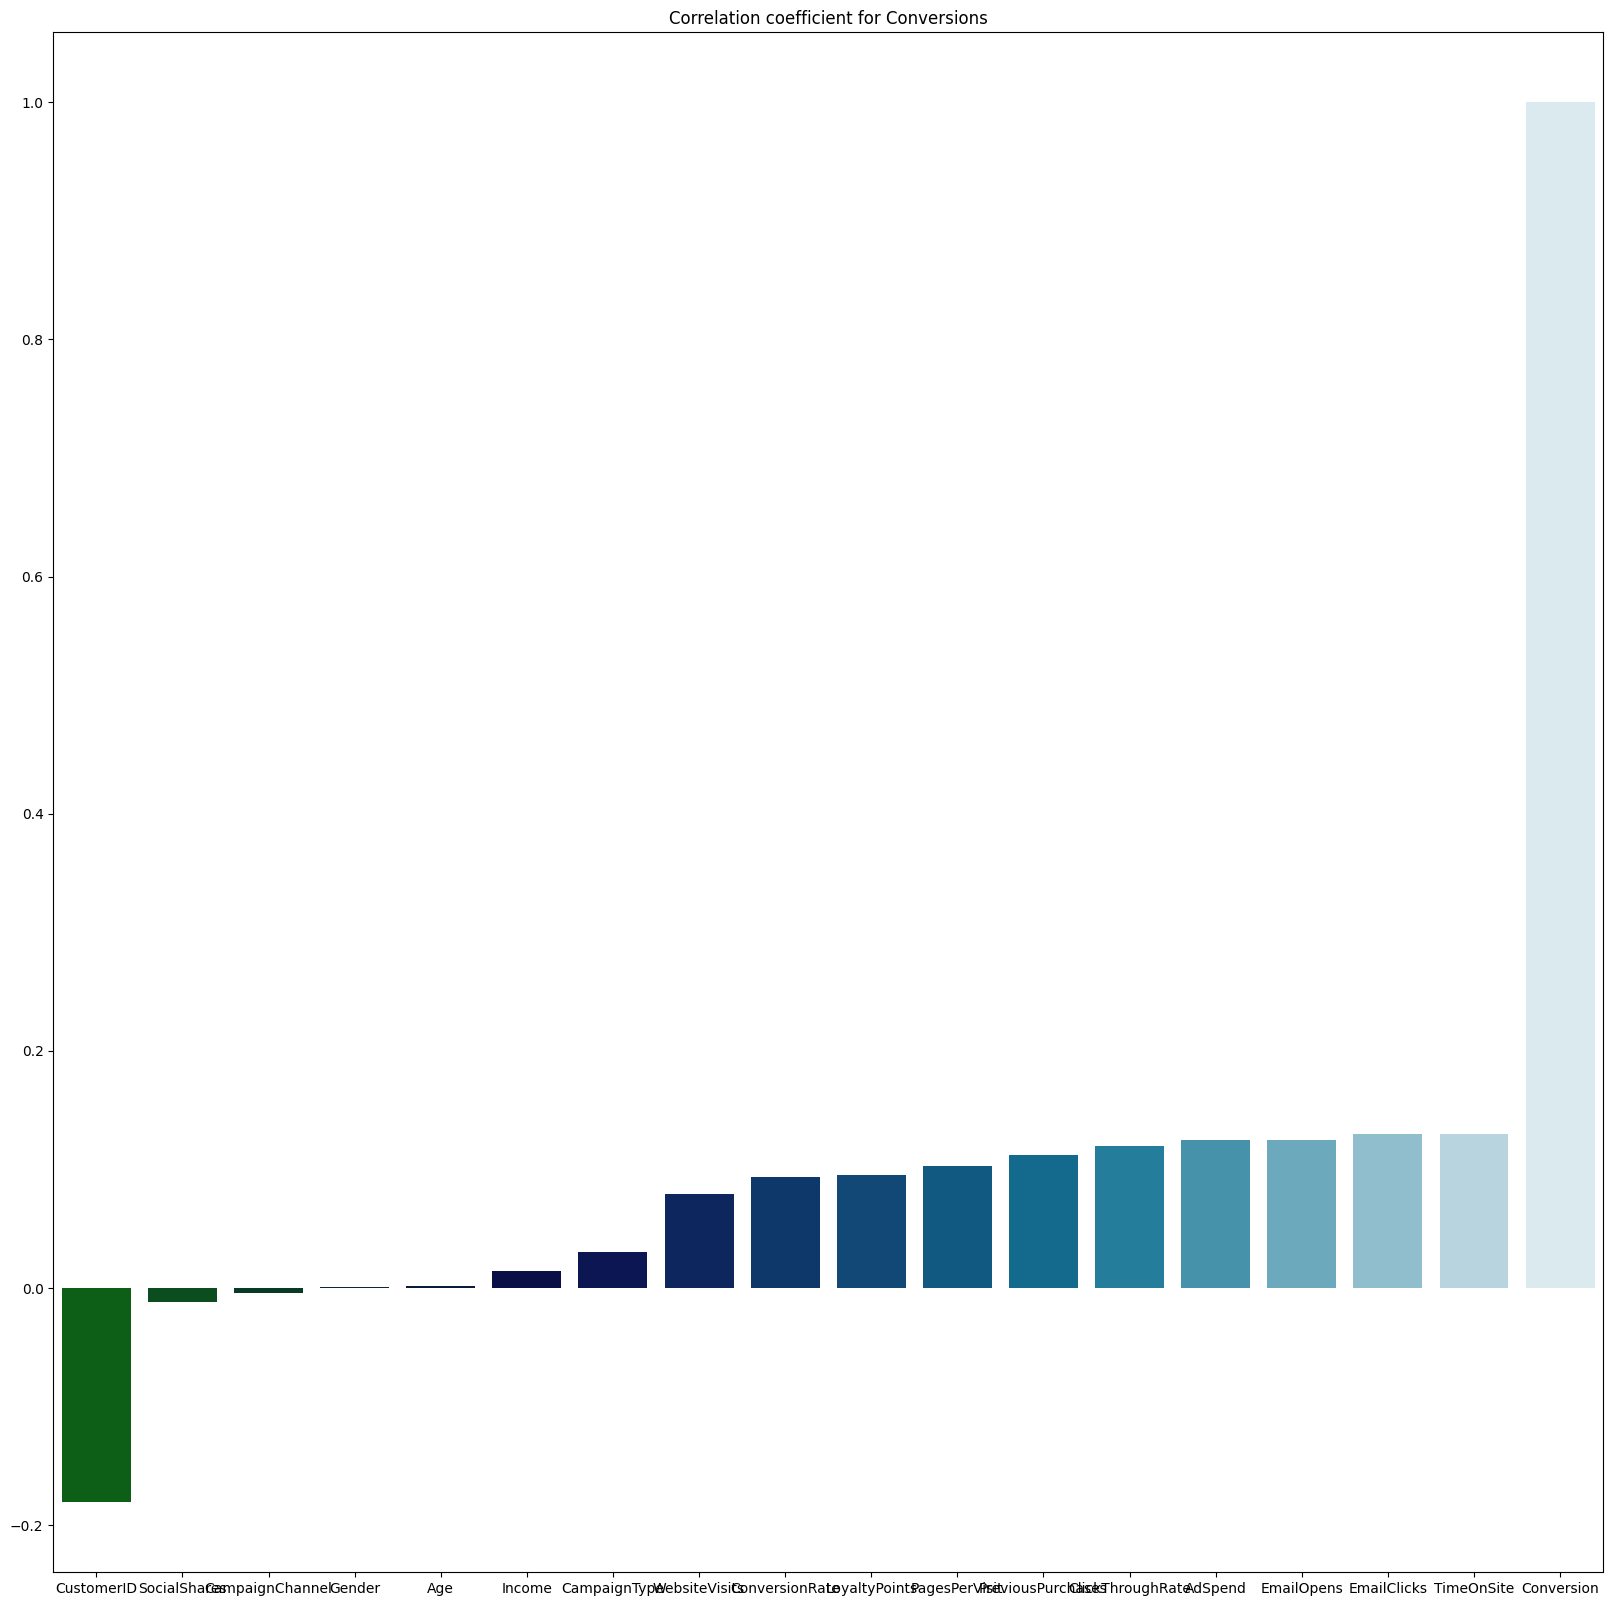

In [8]:
corr_matrix = df_encoded.corr()['Conversion'].sort_values()

plt.figure(figsize=(20, 20))
plt.title("Correlation coefficient for Conversions")
sns.barplot(x=corr_matrix.index.values.tolist(), y=corr_matrix.values.tolist(), palette='ocean')

In [9]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def compute_loss(y_target, y_pred, epsilon):
  # binary cross entropy
  y1 = y_target * np.log(y_pred + epsilon)
  y2 = (1-y_target) * np.log(1 - y_pred + epsilon)
  return -np.mean(y1 + y2)

def gradient(x, y, weights, b):
  a = sigmoid(np.dot(x, weights) + b)
  error = a - y
  dw = np.dot(error, x) / len(y)
  db = np.mean(error)
  return dw, db

def get_ypred(X, w, b):
  p = sigmoid(np.dot(X, w) + b)
  p_score = p.copy()
  p[p > 0.5] = 1
  p[p <= 0.5] = 0
  return p, p_score

def evaluate_metrics(y_pred, y_true):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [10]:
class Optimizer:
    def __init__(self, weights, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-9):
        self.weights = weights
        self.lr = lr
        self.momentum = np.zeros_like(weights)
        self.squared_grad = np.zeros_like(weights)
        self.beta1 = beta1  # For Momentum/Adam
        self.beta2 = beta2  # For RMSProp/Adam
        self.t = 0  # Time step (for Adam)
        self.epsilon = epsilon

    def momentum_update(self, dw):
        self.momentum = self.beta1 * self.momentum + (1 - self.beta1) * dw
        self.weights -= self.lr * self.momentum

    def rmsprop_update(self, dw):
        self.squared_grad = self.beta2 * self.squared_grad + (1 - self.beta2) * (dw**2)
        self.weights -= self.lr * dw / (np.sqrt(self.squared_grad) + self.epsilon)

    def adam_update(self, dw):
        self.t += 1
        self.momentum = self.beta1 * self.momentum + (1 - self.beta1) * dw
        self.squared_grad = self.beta2 * self.squared_grad + (1 - self.beta2) * (dw**2)
        m_hat = self.momentum / (1 - self.beta1**self.t)
        v_hat = self.squared_grad / (1 - self.beta2**self.t)
        self.weights -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

In [11]:
def sgd(X, Y, method, optimizer_type=None, lr=0.0001, n_epochs=100, batch_size=32, epsilon=1e-9, beta1=0.9, beta2=0.999):
    x_set = X.values
    y_set = Y.values
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    b = 0

    optimizer = Optimizer(weights, lr=lr, beta1=beta1, beta2=beta2, epsilon=epsilon) if optimizer_type else None

    losses = []
    for epoch in range(n_epochs):
        loss = []

        if method == "Batch":
            # Batch Gradient Descent
            dw, db = gradient(x_set, y_set, weights, b)
            if optimizer_type == "Momentum":
                optimizer.momentum_update(dw)
            elif optimizer_type == "RMSProp":
                optimizer.rmsprop_update(dw)
            elif optimizer_type == "Adam":
                optimizer.adam_update(dw)
            else:
                weights -= lr * dw
            b -= lr * db

            # Compute loss for the entire dataset
            a = sigmoid(np.dot(x_set, weights) + b)
            loss.append(compute_loss(y_set, a, epsilon))

        elif method == "Mini-Batch":
            # Mini-Batch Gradient Descent
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            x_set = x_set[indices]
            y_set = y_set[indices]

            for i in range(0, n_samples, batch_size):
                xi = x_set[i:i+batch_size]
                yi = y_set[i:i+batch_size]

                dw, db = gradient(xi, yi, weights, b)
                if optimizer_type == "Momentum":
                    optimizer.momentum_update(dw)
                elif optimizer_type == "RMSProp":
                    optimizer.rmsprop_update(dw)
                elif optimizer_type == "Adam":
                    optimizer.adam_update(dw)
                else:
                    weights -= lr * dw
                b -= lr * db

                # Compute loss for the batch
                a = sigmoid(np.dot(xi, weights) + b)
                loss.append(compute_loss(yi, a, epsilon))

        elif method == "SGD":
            # Stochastic Gradient Descent
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            for i in indices:
                xi = x_set[i:i+1]
                yi = y_set[i:i+1]

                dw, db = gradient(xi, yi, weights, b)
                if optimizer_type == "Momentum":
                    optimizer.momentum_update(dw)
                elif optimizer_type == "RMSProp":
                    optimizer.rmsprop_update(dw)
                elif optimizer_type == "Adam":
                    optimizer.adam_update(dw)
                else:
                    weights -= lr * dw
                b -= lr * db

                # Compute loss for the sample
                a = sigmoid(np.dot(xi, weights) + b)
                loss.append(compute_loss(yi, a, epsilon))

        # Average loss for the epoch
        losses.append(np.mean(loss))
        # if epoch % 10 == 0:
            # print(f"Epoch {epoch}, Loss: {losses[-1]:.4f}")

    return weights, b, losses


In [12]:
X = df_encoded.copy().drop(['Conversion'], axis=1)
Y = df_encoded.copy()['Conversion']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# precision, accuracy, recall, F1 score
results = []

weights, bias, losses = sgd(X_train, Y_train, method='SGD', optimizer_type='Momentum', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))
weights, bias, losses = sgd(X_train, Y_train, method='SGD', optimizer_type='RSMProp', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))
weights, bias, losses = sgd(X_train, Y_train, method='SGD', optimizer_type='Adam', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))
weights, bias, losses = sgd(X_train, Y_train, method='Batch', optimizer_type='Momentum', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))
weights, bias, losses = sgd(X_train, Y_train, method='Batch', optimizer_type='RSMProp', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))
weights, bias, losses = sgd(X_train, Y_train, method='Batch', optimizer_type='Adam', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))
weights, bias, losses = sgd(X_train, Y_train, method='Mini-Batch', optimizer_type='Momentum', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))
weights, bias, losses = sgd(X_train, Y_train, method='Mini-Batch', optimizer_type='RSMProp', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))
weights, bias, losses = sgd(X_train, Y_train, method='Mini-Batch', optimizer_type='Adam', n_epochs=100)
y_predictor, y_score = get_ypred(X_test, weights, bias)
results.append(evaluate_metrics(y_predictor, Y_test))

for i in results:
    print(i)

<ipython-input-9-3b1d1ec8b884>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-9-3b1d1ec8b884>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-9-3b1d1ec8b884>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-9-3b1d1ec8b884>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-9-3b1d1ec8b884>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-9-3b1d1ec8b884>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


{'accuracy': 0.8583333333333333, 'precision': 0.8807260155574762, 'recall': 0.9695528068506185, 'f1': 0.9230072463768116}
{'accuracy': 0.8541666666666666, 'precision': 0.8815331010452961, 'recall': 0.9628924833491912, 'f1': 0.920418371987267}
{'accuracy': 0.8716666666666667, 'precision': 0.8856405846947549, 'recall': 0.9800190294957184, 'f1': 0.9304426377597109}
{'accuracy': 0.7475, 'precision': 0.8879668049792531, 'recall': 0.8144624167459562, 'f1': 0.8496277915632754}
{'accuracy': 0.8758333333333334, 'precision': 0.8758333333333334, 'recall': 1.0, 'f1': 0.9338071968014215}
{'accuracy': 0.8766666666666667, 'precision': 0.8765638031693077, 'recall': 1.0, 'f1': 0.9342222222222222}
{'accuracy': 0.6258333333333334, 'precision': 0.9168975069252078, 'recall': 0.6298763082778306, 'f1': 0.7467569091934574}
{'accuracy': 0.8758333333333334, 'precision': 0.8758333333333334, 'recall': 1.0, 'f1': 0.9338071968014215}
{'accuracy': 0.81, 'precision': 0.9186164801627671, 'recall': 0.8591817316841104, 

In [13]:
# hyperparameter tuning

def hyperparameter_tuning(X_train, Y_train, methods, optimizers, param_grid, n_epochs=100):
    best_results = []

    for method in methods:
        for optimizer_type in optimizers:
            # print(f"Testing method: {method} with optimizer: {optimizer_type}")

            # Get parameter combinations for the current optimizer type
            param_combinations = list(ParameterGrid(param_grid[optimizer_type]))

            best_params = None
            best_loss = float("inf")

            for params in param_combinations:
                # print(f"Testing parameters: {params}")

                # Run the optimizer on the current method
                weights, bias, losses = sgd(
                    X_train,
                    Y_train,
                    method=method,
                    optimizer_type=optimizer_type,
                    lr=params.get("lr", 0.001),
                    n_epochs=n_epochs,
                    batch_size=params.get("batch_size", 32),
                    beta1=params.get("beta1", 0.9),
                    beta2=params.get("beta2", 0.999),
                )

                final_loss = losses[-1]

                # Track the best combination for the current method + optimizer
                if final_loss < best_loss:
                    best_loss = final_loss
                    best_params = params

                # print(f"Final loss for parameters {params}: {final_loss:.4f}")

            # print(f"Best parameters for method: {method} with optimizer: {optimizer_type} => {best_params}, Loss: {best_loss:.4f}")
            best_results.append({
                "method": method,
                "optimizer": optimizer_type,
                "best_params": best_params,
                "best_loss": best_loss
            })

    return best_results

# Example usage
methods = ["SGD", "Batch", "Mini-Batch"]
optimizers = ["Momentum", "RMSProp", "Adam"]

param_grid = {
    "Momentum": {"lr": [0.01, 0.001], "beta1": [0.9, 0.95], "batch_size": [32, 64]},
    "RMSProp": {"lr": [0.001, 0.0001], "beta2": [0.9, 0.99], "batch_size": [32, 64]},
    "Adam": {"lr": [0.001, 0.0001], "beta1": [0.9, 0.95], "beta2": [0.99, 0.999], "batch_size": [32, 64]},
}

best_results = hyperparameter_tuning(X_train, Y_train, methods, optimizers, param_grid, n_epochs=10)

results_df = pd.DataFrame(best_results)
print(results_df)

<ipython-input-9-3b1d1ec8b884>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


       method optimizer                                        best_params  \
0         SGD  Momentum       {'batch_size': 64, 'beta1': 0.9, 'lr': 0.01}   
1         SGD   RMSProp     {'batch_size': 64, 'beta2': 0.9, 'lr': 0.0001}   
2         SGD      Adam  {'batch_size': 32, 'beta1': 0.9, 'beta2': 0.99...   
3       Batch  Momentum       {'batch_size': 32, 'beta1': 0.9, 'lr': 0.01}   
4       Batch   RMSProp     {'batch_size': 32, 'beta2': 0.9, 'lr': 0.0001}   
5       Batch      Adam  {'batch_size': 32, 'beta1': 0.9, 'beta2': 0.99...   
6  Mini-Batch  Momentum     {'batch_size': 32, 'beta1': 0.95, 'lr': 0.001}   
7  Mini-Batch   RMSProp    {'batch_size': 64, 'beta2': 0.99, 'lr': 0.0001}   
8  Mini-Batch      Adam  {'batch_size': 64, 'beta1': 0.9, 'beta2': 0.99...   

   best_loss  
0   3.900850  
1   0.109700  
2   1.159295  
3   2.556885  
4   1.384970  
5   0.517785  
6   4.141333  
7   1.064795  
8   0.366538  


4. Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets.


SGD: Best for simplicity and memory efficiency but slow convergence.

Batch GD: Ideal for small datasets, but not practical for large-scale problems.

Mini-Batch GD: Balances efficiency and convergence stability. Best of both worlds ideally.

Momentum: Adds speed and reduces oscillations, great for smooth optimization.

RMSProp: Excellent for non-stationary objectives, widely used in deep learning.

Adam: Combines the best of Momentum and RMSProp, excelling in complex, large-scale problems.